# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 9.25

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [124]:
!pip install folium

In [125]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [126]:
import numpy as np

# import ...  # your favorite data package
import pandas as pd

# import ...  # your favorite visualization package
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [127]:
data_train = pd.read_csv('train.csv')
data_train.head(5)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [128]:
data_train.drop(['dropoff_datetime'], axis=1, inplace=True)
data_train['pickup_datetime'] = pd.to_datetime(data_train['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

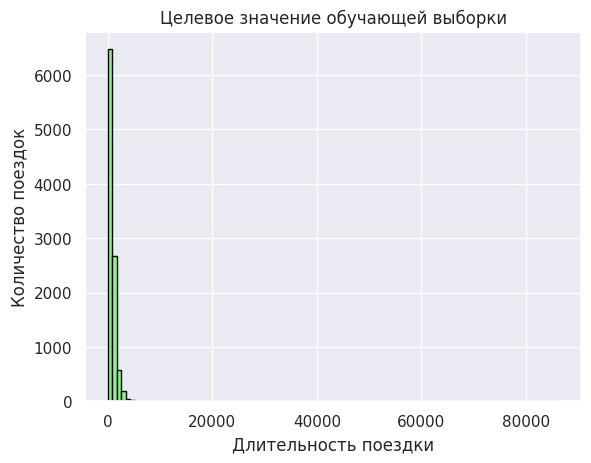

In [129]:
plt.title('Целевое значение обучающей выборки')
plt.hist(data_train['trip_duration'].sample(10000), bins=100, color="lightgreen",edgecolor= 'black')
plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Видно, что основная часть значений распределене где-то между 0 и 5000, однако правее 80000 на гистограме тоже виднеется какой-то столбец - значит, в данных есть выбросы. Посмотрим на них:

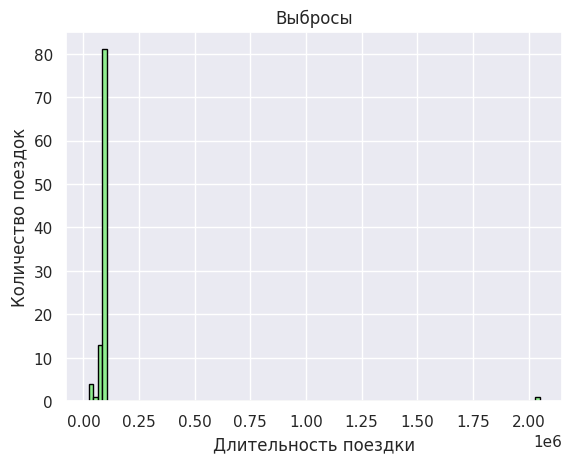

In [130]:
plt.title('Выбросы')
plt.hist(data_train[data_train['trip_duration'] > 20000]['trip_duration'].sample(100), bins=100, color="lightgreen",edgecolor= 'black')
plt.xlabel('Длительность поездки')
plt.ylabel('Количество поездок')
plt.show()

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

 RMSLE снижает влияние больших ошибок для больших значений целевой переменной, поскольку логарифмическая функция сглаживает разницу между предсказанием и реальным значением, особенно когда они велики. Она лучше отражает относительные ошибки, что важно, если целевая переменная имеет широкий диапазон (так и есть для длительности поездки - видно по гистограмме).

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y_i} - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y_i} - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [131]:
data_train['log_trip_duration'] = np.log1p(data_train['trip_duration'])

In [132]:
data_train.drop('trip_duration', axis=1)

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  log_trip_duration  
0               40.765602                  N           6.122493  
1               40.731152                  N           6.498282  
2               40.710087                  N           7.661527  
3               40.706718                  N           6.063785  
4               40.782520                  N           6.077642  
...                   ...                ...                ...  
1458639         40.740170                  N           6.658011  
1458640         40.796547                  N           6.486161  
1458641         40.707371                  N           6.639876  
1458642         40.757107                  N           5.924256  
1458643         40.790585                  N           5.293305  

[1458644 rows x 10 columns]

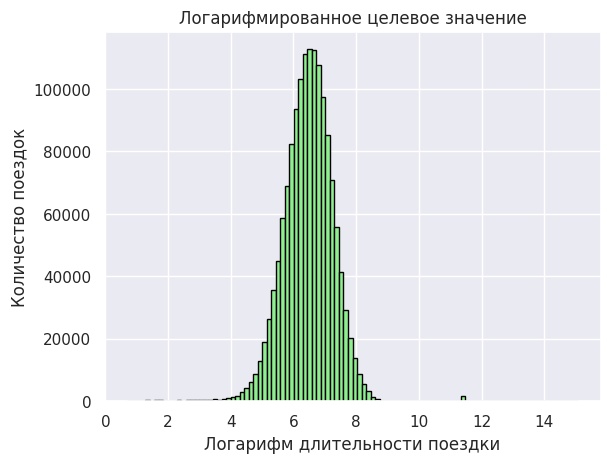

In [133]:
plt.title('Логарифмированное целевое значение')
plt.hist(data_train['log_trip_duration'], bins=100, color="lightgreen", edgecolor= 'black')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Количество поездок')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [134]:
from sklearn.metrics import root_mean_squared_error

In [135]:
def rmsle(log1p_y_true, log1p_y_pred):
    return root_mean_squared_error(log1p_y_true, log1p_y_pred)

data_train['pred_const'] = data_train['log_trip_duration'].mean()
rmsle_best_const = rmsle(data_train['log_trip_duration'], data_train['pred_const'])
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

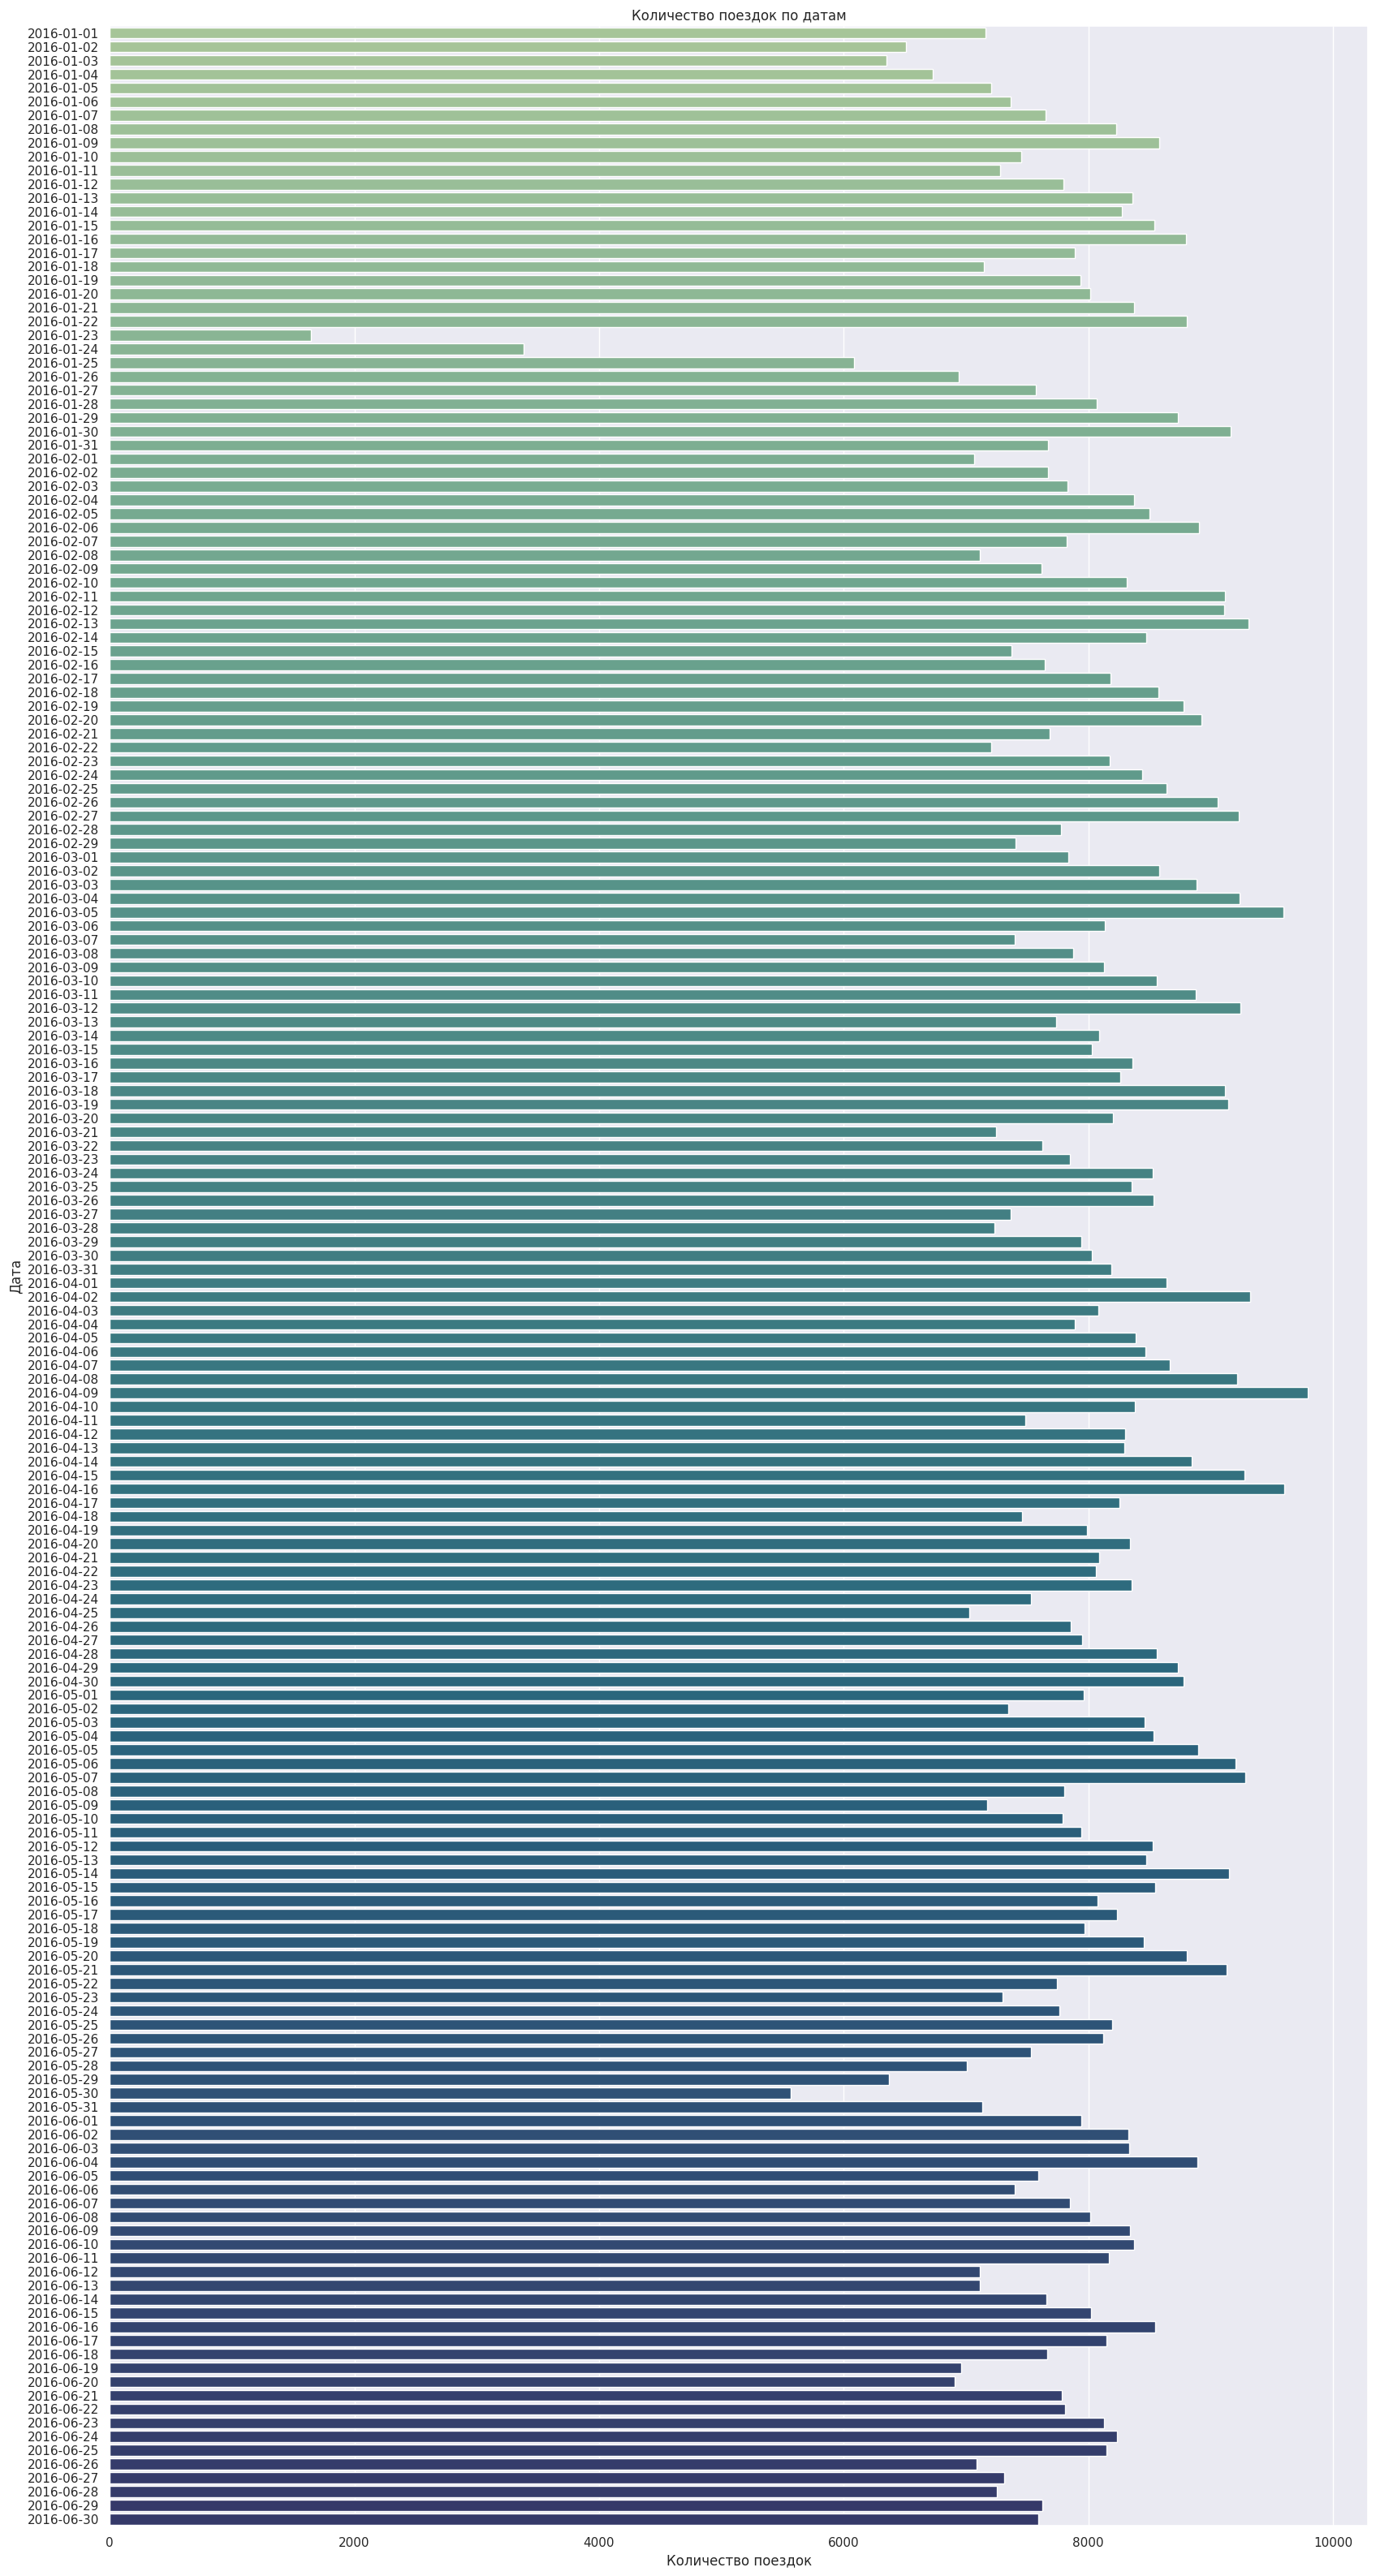

In [136]:
plt.figure(figsize = (20,40))
dates_sorted = data_train['pickup_datetime'].dt.date.sort_values()
plt.title('Количество поездок по датам')
sns.countplot(y=dates_sorted, data=data_train, palette="crest", hue=dates_sorted, legend=False)
plt.xlabel('Количество поездок')
plt.ylabel('Дата')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

1. 23 - 24 января 2016 года: "В Нью-Йорке из-за снежной бури запретили автомобильное движение"

  https://www.rbc.ru/society/23/01/2016/56a3e5799a79474d3a9a9598
2.  30 мая 2016 года: "День поминовения в Нью-Йорке"

  https://brightonbeachnews.com/rus/день-поминовения-в-нью-йорке/
  
  Из-за парада могли перекрыть дороги для автомобилей

In [137]:
day_of_week = data_train.groupby(data_train['pickup_datetime'].dt.day_name())['id'].count().reset_index()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week['pickup_datetime'] = pd.Categorical(day_of_week['pickup_datetime'], categories=order, ordered=True)
hour = data_train.groupby(data_train['pickup_datetime'].dt.hour)['id'].count()

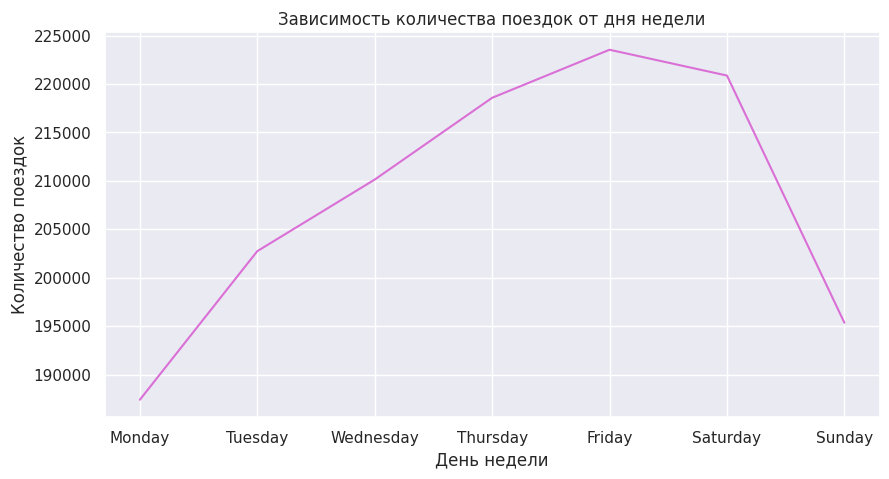

In [138]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,5))
plt.title('Зависимость количества поездок от дня недели')
sns.lineplot(data=pd.DataFrame(day_of_week), y='id', x='pickup_datetime',color='orchid')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.show()

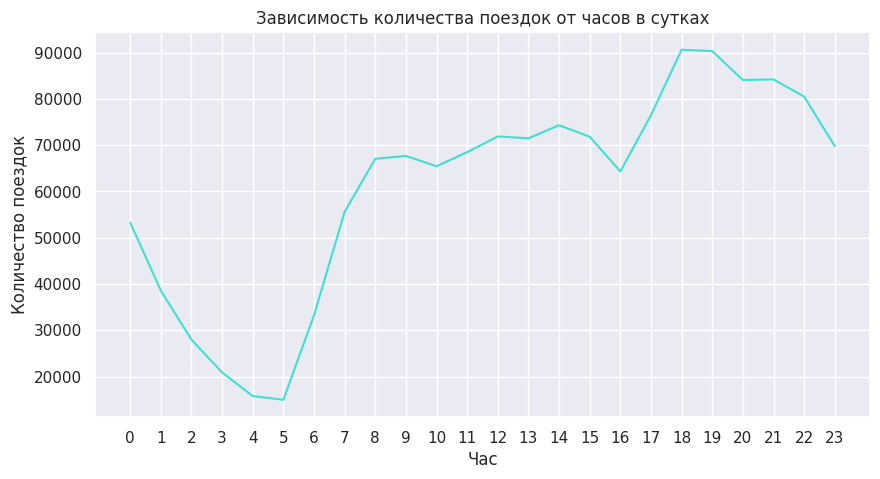

In [139]:
plt.figure(figsize = (10,5))
plt.title('Зависимость количества поездок от часов в сутках')
sns.lineplot(data=pd.DataFrame(hour), y='id', x='pickup_datetime',color='turquoise')
plt.xlabel('Час')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [140]:
months = pd.DataFrame(data_train.groupby([data_train['pickup_datetime'].dt.month, data_train['pickup_datetime'].dt.hour])['id'].count())
months.index = months.index.rename(['Месяц', 'hours'])
months = months.reset_index()

In [141]:
day_of_week = pd.DataFrame(data_train.groupby([data_train['pickup_datetime'].dt.day_name(), data_train['pickup_datetime'].dt.hour])['id'].count())
day_of_week.index = day_of_week.index.rename(['День недели', 'hours'])
day_of_week.reset_index(inplace=True)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week['День недели'] = pd.Categorical(day_of_week['День недели'], categories=order, ordered=True)

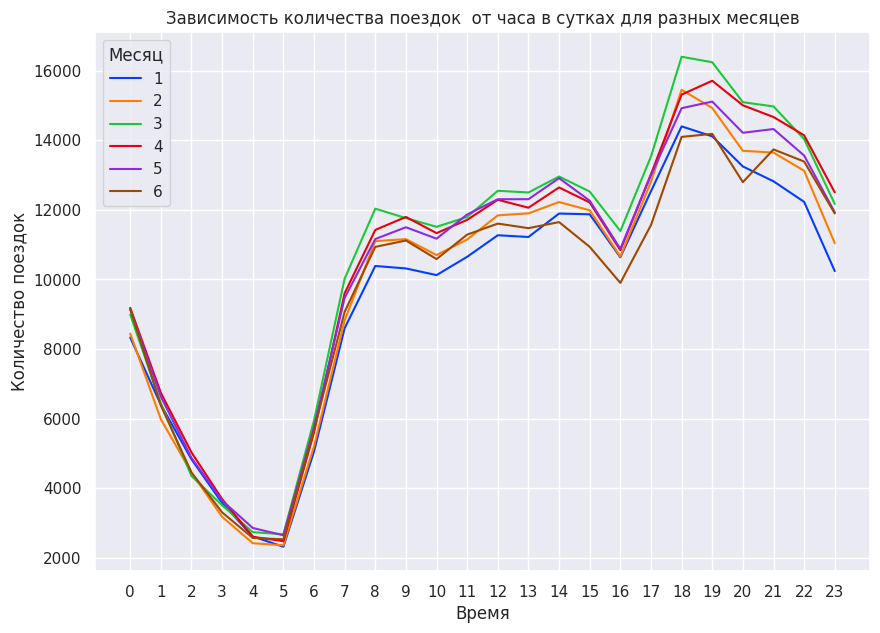

In [142]:
plt.figure(figsize = (10,7))
plt.title('Зависимость количества поездок  от часа в сутках для разных месяцев')
sns.lineplot(data=months, y='id', x='hours', palette="bright", hue='Месяц')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.show()

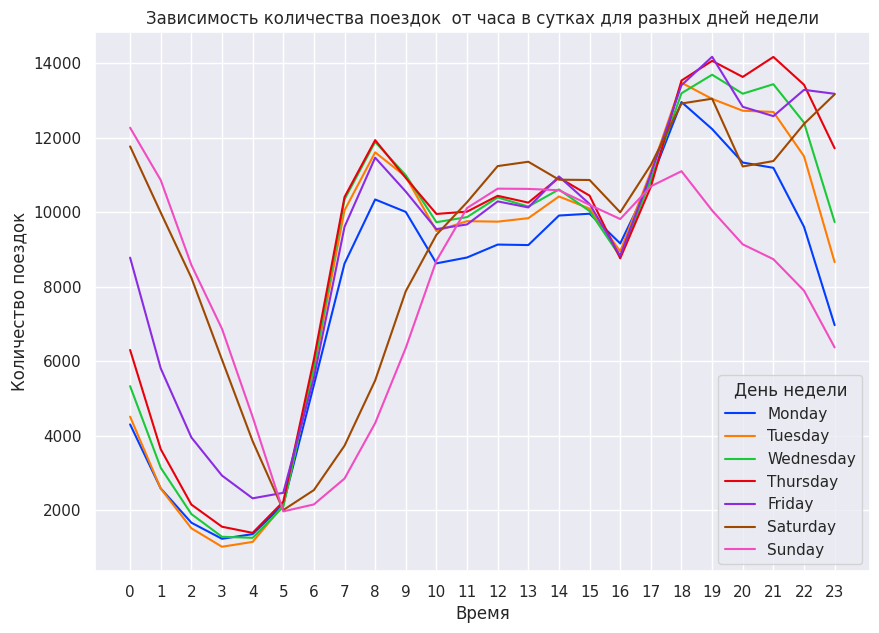

In [143]:
plt.figure(figsize = (10,7))
plt.title('Зависимость количества поездок  от часа в сутках для разных дней недели')
sns.lineplot(data=day_of_week, y='id', x='hours', palette="bright", hue='День недели')
plt.xlabel('Время')
plt.ylabel('Количество поездок')
plt.xticks(range(24))
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

С полуночи до 5 утра больше всего поездок приходится на воскресенье и субботу - это может быть связано с тем, что в пятницу после работы и субботу люди где-то отдыхают, употребляют алкоголь и поэтому возвращаются домой на такси. В будние дни больше всего поездок приходится на 7-8 утра и 18-19 вечера - вполне логично, поскольку люди едут на работу и с работы.

На графике зависимости количества поездок от часа в сутках для разных месяцев видно, что нет таких заметных различий для разных месяцев, как это было с днями недели. Однако можем заметить, что линия, соответсвующая первому месяцу, находится ниже остальных - это может быть связано с тем, что в плохую погоду (как мы уже отметили, в январе были сильные снегопады) люди предпочитают оставаться дома и никуда не ехать.


**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [144]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_train, test_size=0.3, random_state=42)

<Figure size 500x500 with 0 Axes>

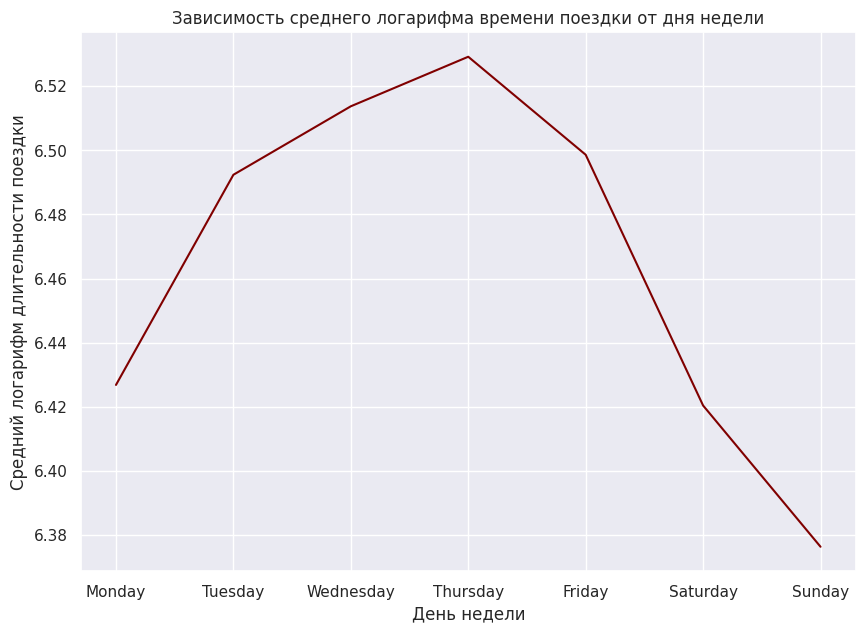

In [145]:
plt.figure(figsize = (5,5))
weekday = pd.DataFrame(train.groupby(train['pickup_datetime'].dt.day_name())['log_trip_duration'].mean()).reset_index()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday['pickup_datetime'] = pd.Categorical(weekday['pickup_datetime'], categories=order, ordered=True)
plt.figure(figsize = (10,7))
plt.title('Зависимость среднего логарифма времени поездки от дня недели')
sns.lineplot(data=weekday, y='log_trip_duration', x='pickup_datetime', color='maroon')
plt.xlabel('День недели')
plt.ylabel('Средний логарифм длительности поездки')
plt.show()

<Figure size 500x500 with 0 Axes>

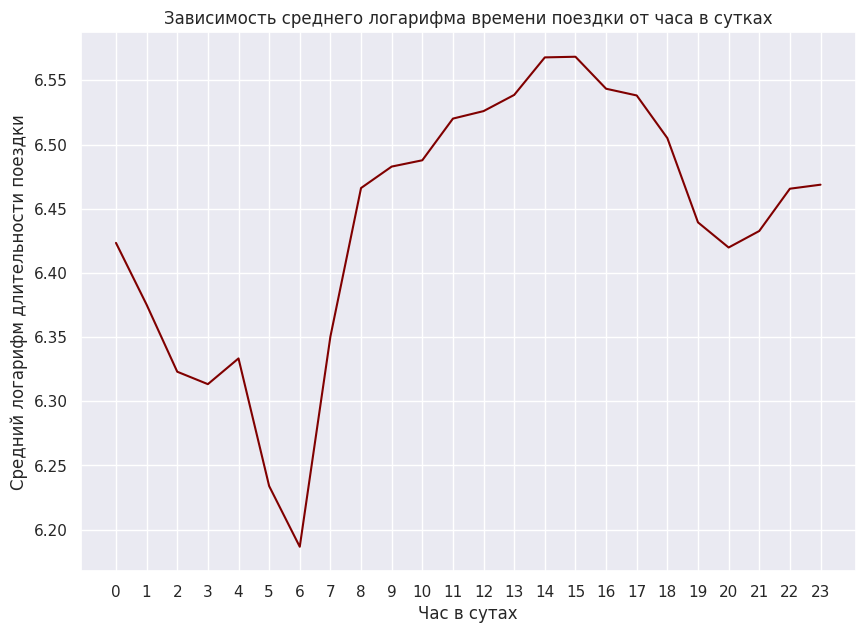

In [146]:
plt.figure(figsize = (5,5))
hour = pd.DataFrame(train.groupby(train['pickup_datetime'].dt.hour)['log_trip_duration'].mean()).reset_index()
plt.figure(figsize = (10,7))
plt.title('Зависимость среднего логарифма времени поездки от часа в сутках')
sns.lineplot(data=hour, y='log_trip_duration', x='pickup_datetime', color='maroon')
plt.xlabel('Час в сутах')
plt.ylabel('Средний логарифм длительности поездки')
plt.xticks(range(24))
plt.show()

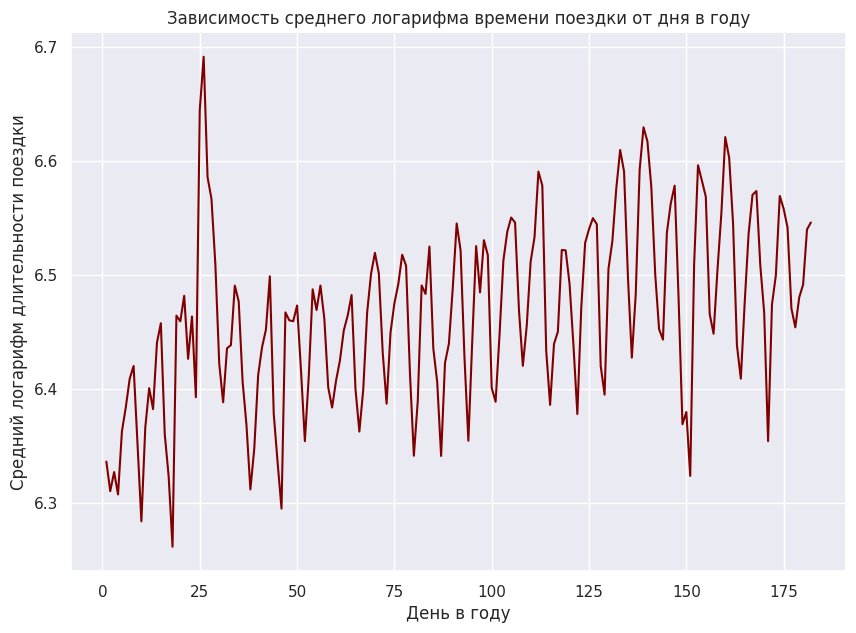

In [147]:
hour = pd.DataFrame(train.groupby(train['pickup_datetime'].dt.dayofyear)['log_trip_duration'].mean()).reset_index()
plt.figure(figsize = (10,7))
plt.title('Зависимость среднего логарифма времени поездки от дня в году')
sns.lineplot(data=hour, y='log_trip_duration', x='pickup_datetime', color='maroon')
plt.xlabel('День в году')
plt.ylabel('Средний логарифм длительности поездки')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Да, графики похожи, что вполне логично: при большом количестве заказов становится больше машин на дорогах, образовываются пробки, вследствие чего и среднее время поездок увеличивается.  

В первый аномальный период (23-24 дни года) длительность поездки близка к среднему: это связано с тем, что добираться в снегопадо тяжело, движение замедленное, однако и поездок, то есть машин на дорогах, было совсем мало, так что длительность в связи со снегопадом компенсируется отсутствием пробок. Однако видно, как возросла длительность на 25-26 день: так как выходными были объявлены только 23-24 января, после этого людям пришлось ехать на работу, но последствия сильного снегопада не исчезают мгновенно, поэтому вследствие заснеженных дорог и высокого спроса длительность поездок очень сильно возросла.

In [148]:
data_train[(data_train['pickup_datetime'].dt.day == 30) & (data_train['pickup_datetime'].dt.month == 5)].iloc[0].pickup_datetime.day_of_year

151

Во второй аномальный период (151 день года) длительность поездок очень сильно упала: как и предполагалось ранее, многие улицы в связи с праздником могли перекрыть, количество поездок сократилось, и если люди и ездили куда-то, то на короткие расстояния, то есть поездки занимали мало времени.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [149]:
test['day_of_week'] = test['pickup_datetime'].dt.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
test['day_of_week'] = pd.Categorical(test['day_of_week'], categories=order, ordered=True)
test['month'] = test['pickup_datetime'].dt.month
test['hour'] = test['pickup_datetime'].dt.hour
test['day'] = test['pickup_datetime'].dt.day # для удобства, не из задания
test['is_abnormal_1'] = ((test['month'] == 1) & ((test['day'] == 23) | (test['day'] == 24))).astype(int)
test['is_abnormal_2'] = ((test['month'] == 5) & (test['day'] == 30)).astype(int)
test['day_of_year'] = test['pickup_datetime'].dt.dayofyear

In [150]:
train['day_of_week'] = train['pickup_datetime'].dt.day_name()
train['day_of_week'] = pd.Categorical(train['day_of_week'], categories=order, ordered=True)
train['month'] = train['pickup_datetime'].dt.month
train['hour'] = train['pickup_datetime'].dt.hour
train['day'] = train['pickup_datetime'].dt.day # для удобства, не из задания
train['is_abnormal_1'] = ((train['month'] == 1) & ((train['day'] == 23) | (train['day'] == 24))).astype(int)
train['is_abnormal_2'] = ((train['month'] == 5) & (train['day'] == 30)).astype(int)
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

На мой взгляд, все 5 признаков являются категориальными:

*   является ли период аномальным - бинарный признак, который можем рассматривать, как категориальный
*   день недели - всего 7 возможных нечисловых значений, категориальный признак
*   месяц - в наших данных всего 6 возможных нечисловых значений, категориальный признак
*   час - принимает числовые значения из ограниченного мнржества (24 значения); в контексте задач прогнозирования стоит рассматривать каждый час как отдельную категорию (например, час пик) => категориальный
*   номер дня в году - тоже числовое значение, однако, как и с часом, нет особого смысла по нему сортировать или производить какие-либо арифметические операции - важна, опять же, категория: например: выходные, праздники и т.д.



**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [151]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

categorical = ['day_of_week', 'month', 'hour', 'is_abnormal_1', 'is_abnormal_2', 'day_of_year']
numeric_features = []

y_train = train['log_trip_duration']
y_test = test['log_trip_duration']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train[categorical], y_train)
y_pred = model.predict(test[categorical])
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.7871


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [152]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True,
            popup=f"Lat: {lat}, Lon: {lon}"
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [153]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def get_sample_coordinates(df, sample_size):
    sample_df = df.sample(sample_size)
    return sample_df['pickup_latitude'], sample_df['pickup_longitude']

your_lat_values, your_lon_values = get_sample_coordinates(data_train, 1000)

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

На мой взгляд, выделяются два аэропорта: John F. Kennedy International Airport и LaGuardia Airport. Есть еще точки, которые лежат в отдалении, однако они единичны. В аэропортах же точек довольно много, и это логично: люди, которые прилетают из других городов и стран, часто добираются до пункта назначения на такси. В рамках нашей задачи их особенность в том, что аэропорт расположен далеко от города, поэтому поездки будут долгими. Кроме того, для поездок из аэропорта время, день недели и месяц особо не играют роли: возможно, есть какая-то сезонность, но вообще люди улетают по абсолютно разным причинам: на праздники, в командировку и т.д.

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

Воспользуемся кодом с первого семинара:

In [154]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [155]:
train['haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test['haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [156]:
train['log_haversine'] = np.log1p(train['haversine'])
test['log_haversine'] = np.log1p(test['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [157]:
correlation_train = train[['log_trip_duration', 'haversine', 'log_haversine']].corr()
correlation_train

log_trip_duration  haversine  log_haversine
log_trip_duration           1.000000   0.565406       0.749959
haversine                   0.565406   1.000000       0.833329
log_haversine               0.749959   0.833329       1.000000

In [158]:
correlation_test = test[['log_trip_duration', 'haversine', 'log_haversine']].corr()
correlation_test

log_trip_duration  haversine  log_haversine
log_trip_duration           1.000000   0.594255       0.749703
haversine                   0.594255   1.000000       0.872741
log_haversine               0.749703   0.872741       1.000000

Убедились (корреляция больше)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

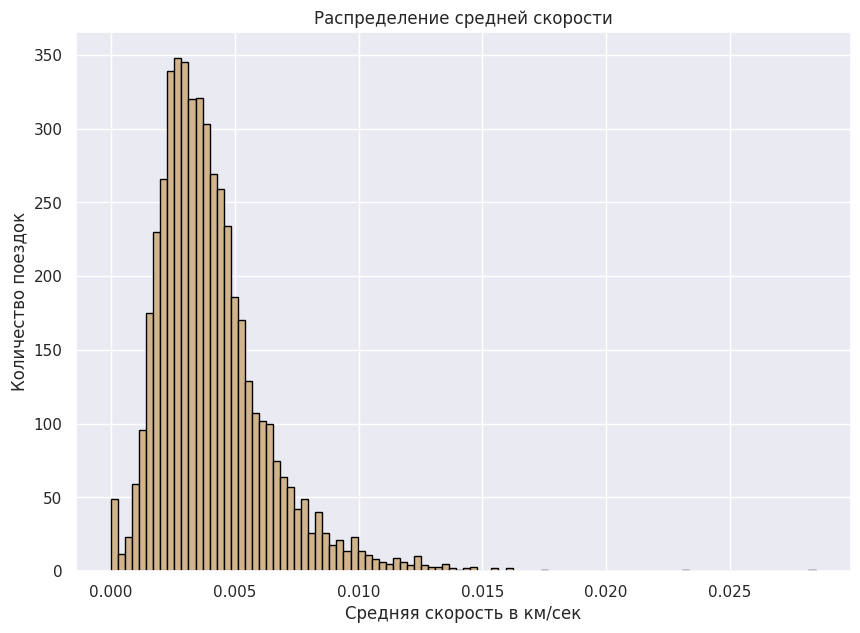

In [159]:
train['avg_speed'] = train['haversine'] / train['trip_duration']
plt.figure(figsize = (10, 7))
plt.title('Распределение средней скорости')
plt.hist(train['avg_speed'].sample(5000), bins=100, color="tan",edgecolor= 'black')
plt.xlabel('Средняя скорость в км/сек')
plt.ylabel('Количество поездок')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

Рассмотрим 0.9 квантиль:

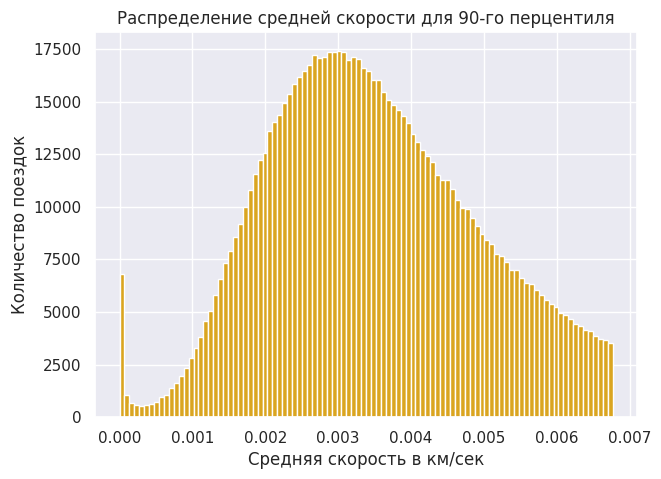

In [160]:
avg_speed_ninety = np.quantile(train['avg_speed'], 0.9)
mask = train['avg_speed'] < avg_speed_ninety

plt.figure(figsize = (7, 5))
plt.title('Распределение средней скорости для 90-го перцентиля')
plt.hist(train.loc[mask, 'avg_speed'], bins=100, color="goldenrod")
plt.xlabel('Средняя скорость в км/сек')
plt.ylabel('Количество поездок')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [161]:
grouped_avg_speed = train.groupby(['day_of_week', 'hour']).agg({'avg_speed': 'median'})
grouped_avg_speed.reset_index(inplace=True)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_avg_speed['day_of_week'] = pd.Categorical(grouped_avg_speed['day_of_week'], categories=order, ordered=True)

<ipython-input-161-669e646559b8>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_avg_speed = train.groupby(['day_of_week', 'hour']).agg({'avg_speed': 'median'})


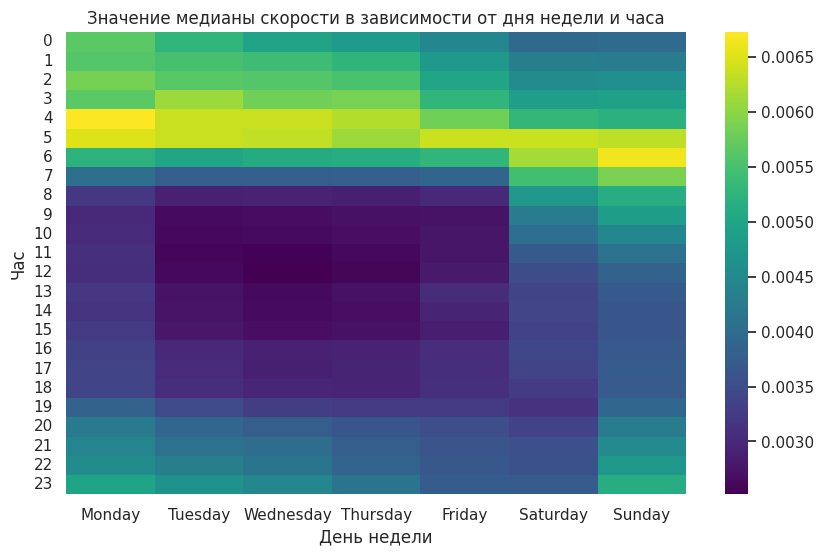

In [162]:
plt.figure(figsize=(10, 6))
plt.title('Значение медианы скорости в зависимости от дня недели и часа')
sns.heatmap(grouped_avg_speed.pivot(index='hour', columns='day_of_week', values='avg_speed'), cmap='viridis')
plt.xlabel('День недели')
plt.ylabel('Час')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [163]:
train.drop('avg_speed', axis=1, inplace=True)

Потому что среднюю скорость мы считали по формуле $t = s / v_{\text{ср}}$, то есть учитывали время, которое в результате должны предсказать, и предполагается, что до этого момента мы его не знаем => не можем использовать в расчетах других признаков

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Максимальная скорость с понедельника по среду с 4 до 5 утра, с пятницы по воскресенье в 5 утра. Минимальная скорость со вторника по четверг с 9 до 18, в пятницу с 9 до 15.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [164]:
def is_free(df):
  df['is_free'] = (((df['day_of_week'] >= "Monday") \
                      & (df['day_of_week'] <= "Wednesday") \
                      & (df['hour'] >= 4) \
                      & (df['hour'] <= 5)) | \
                      ((df['day_of_week'] >= "Friday") \
                      & (df['day_of_week'] <= "Sunday") \
                      & (df['hour'] == 5))).astype(int)
  return df

def is_traffic(df):
  df['is_traffic'] = (((df['day_of_week'] >= "Tuesday") \
                      & (df['day_of_week'] <= "Thursday") \
                      & (df['hour'] >= 9) \
                      & (df['hour'] <= 18)) | \
                      ((df['day_of_week'] == "Friday") \
                      & (df['hour'] >= 9) \
                      & (df['hour'] <= 15))).astype(int)
  return df

In [165]:
train = is_traffic(train)
train = is_free(train)

test = is_traffic(test)
test = is_free(test)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [166]:
def bool_start_end(df, place, latitude, longitude):
    df['is_from_' + place] = (np.abs(df['pickup_latitude'] - latitude) <= 0.01) & (np.abs(df['pickup_longitude'] - longitude) <= 0.01).astype(int)
    df['is_to_' + place] = (np.abs(df['dropoff_latitude'] - latitude) <= 0.01) & (np.abs(df['dropoff_longitude'] - longitude) <= 0.01).astype(int)
    return df

# Я добавила отображение координат на карту в первый график части 2, чтобы определить центральную точку для каждого участка
train = bool_start_end(train, 'Kennedy_International_Airport', latitude=40.645633697509766, longitude=-73.78543853759764)
test = bool_start_end(test, 'Kennedy_International_Airport', latitude=40.64517176414771, longitude=-73.78543853759764)

train = bool_start_end(train, 'LaGuardia_Airport', latitude=40.77140426635742, longitude=-73.86522674560547)
test = bool_start_end(test, 'LaGuardia_Airport', latitude=40.77140426635742, longitude=-73.86522674560547)

Признаки могут полезны тем, что аэропорты расположены вдали от Нью-Йорка, поэтому поездки из аэропорта и в аэропорт будут занимать дольше времени, чем обычные поездки по городу. Однако они расположены в разных местах, поэтому можем для каждого из них отдельно оценить время в дороге.

Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

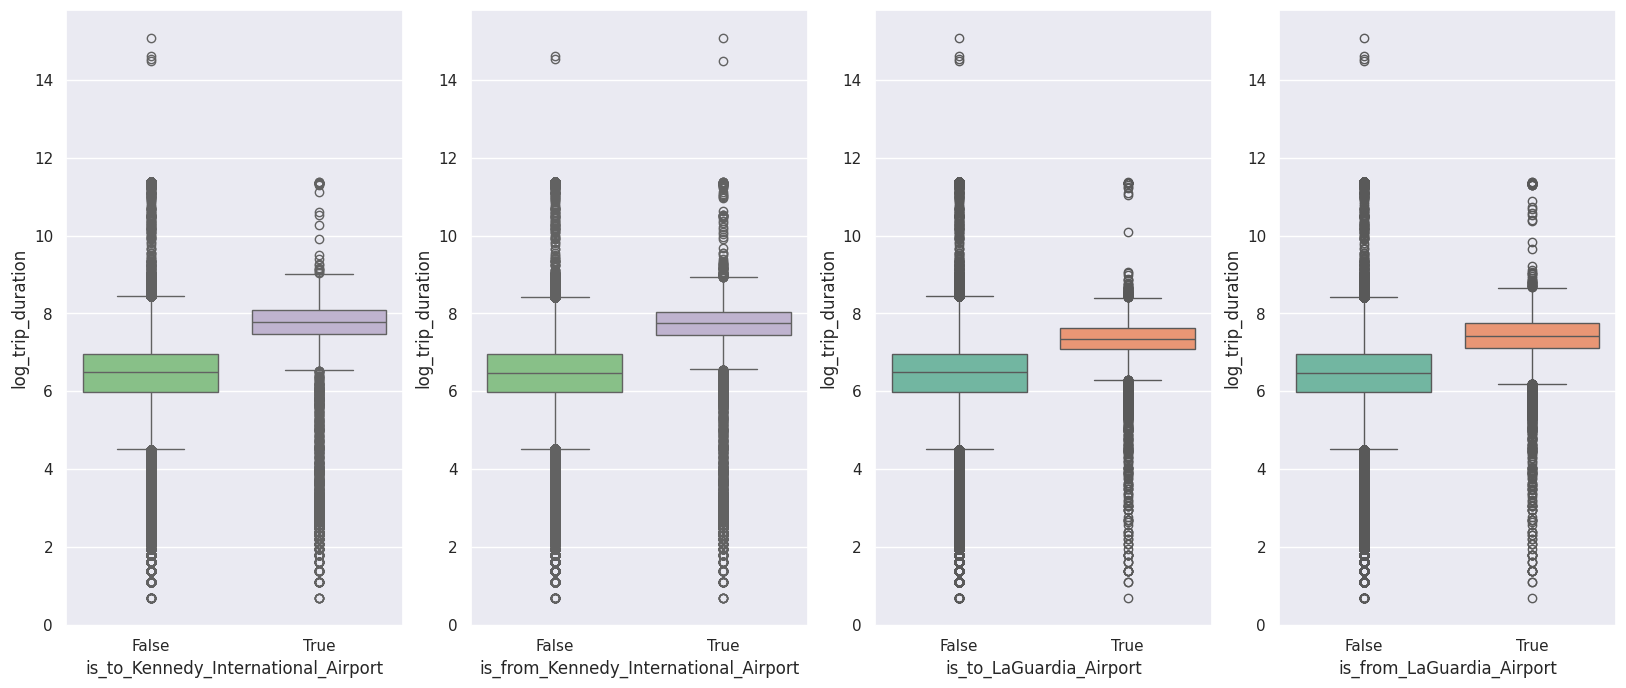

In [167]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

sns.boxplot(x=train['is_to_Kennedy_International_Airport'], y=y_train, hue=train['is_to_Kennedy_International_Airport'], ax=axes[0], palette='Accent', legend=False)
sns.boxplot(x=train['is_from_Kennedy_International_Airport'], y=y_train, hue = train['is_from_Kennedy_International_Airport'], ax=axes[1], palette='Accent', legend=False)
sns.boxplot(x=train['is_to_LaGuardia_Airport'], y=y_train, ax=axes[2], hue = train['is_to_LaGuardia_Airport'], palette='Set2', legend=False)
sns.boxplot(x=train['is_from_LaGuardia_Airport'], y=y_train, ax=axes[3], hue = train['is_from_LaGuardia_Airport'], palette='Set2', legend=False)

plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

Мне кажется, что да, поскольку гипотеза подтвердилась: у поездок из аэропорта и в аэропорт длительность действительно дольше, чем у остальных.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [205]:
import numpy as np
import pandas as pd
import random
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lat_range, lon_range, rows=5, cols=5):
        self.lat_range = lat_range
        self.lon_range = lon_range
        self.rows = rows
        self.cols = cols
        self.grid_cells = None

    def define_grid_cells(self):
        lat_step = (self.lat_range[1] - self.lat_range[0]) / self.rows
        lon_step = (self.lon_range[1] - self.lon_range[0]) / self.cols
        cells = []
        for row in range(self.rows):
            for col in range(self.cols):
                lat_min = self.lat_range[0] + row * lat_step
                lon_min = self.lon_range[0] + col * lon_step
                lat_max = lat_min + lat_step
                lon_max = lon_min + lon_step
                cells.append(((lat_min, lon_min), (lat_max, lon_max)))
        return cells

    def show_map(self, data, latitude_column='pickup_latitude', longitude_column='pickup_longitude', cell_column='pickup_cell'):
        center_lat = (self.lat_range[0] + self.lat_range[1]) / 2
        center_lon = (self.lon_range[0] + self.lon_range[1]) / 2
        m = folium.Map(location=[center_lat, center_lon], zoom_start=12)
        colors = ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(self.rows * self.cols)]
        for idx, ((lat_min, lon_min), (lat_max, lon_max)) in enumerate(self.grid_cells):
            folium.Rectangle(
                bounds=[(lat_min, lon_min), (lat_max, lon_max)],
                color="indigo",
                fill=True
            ).add_to(m)
        for _, row in data.iterrows():
            cell_idx = row[cell_column]
            if cell_idx != -1:
                point_color = colors[cell_idx % len(colors)]
            else:
                point_color = 'gray'

            folium.CircleMarker(
                location=(row[latitude_column], row[longitude_column]),
                radius=1,
                color=point_color,
                fill=True,
                fill_opacity=0.5
            ).add_to(m)
        return m

    def fit(self, X, y=None):
        self.grid_cells = self.define_grid_cells()
        return self

    def _find_cell_index(self, lat, lon):
        for idx, ((lat_min, lon_min), (lat_max, lon_max)) in enumerate(self.grid_cells):
            if lat_min <= lat <= lat_max and lon_min <= lon <= lon_max:
                return idx
        return -1

    def transform(self, X, y=None):
        X_copy = X.copy()

        X_copy['pickup_cell'] = [
            self._find_cell_index(lat, lon)
            for lat, lon in zip(X_copy['pickup_latitude'], X_copy['pickup_longitude'])
        ]
        X_copy['dropoff_cell'] = [
            self._find_cell_index(lat, lon)
            for lat, lon in zip(X_copy['dropoff_latitude'], X_copy['dropoff_longitude'])
        ]

        return X_copy


Давайте сделаем сетку 4 x 4

In [206]:
transformer = MapGridTransformer(
    lat_range=[40.70050567626953, 40.790555236816406],
    lon_range=[-74.02408386230467, -73.94652221679686],
    rows=4,
    cols=4
)
train = transformer.fit_transform(train)
test = transformer.transform(test)
m = transformer.show_map(train.sample(1000), 'pickup_latitude', 'pickup_longitude', 'pickup_cell')

m

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [170]:
categorical = ['day_of_week', 'month', 'hour', 'is_abnormal_1', 'is_abnormal_2', 'day_of_year', 'is_traffic', 'is_free',
               'is_to_Kennedy_International_Airport', 'is_from_Kennedy_International_Airport', 'is_to_LaGuardia_Airport', 'is_from_LaGuardia_Airport',
               'pickup_cell', 'dropoff_cell']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train[categorical + numeric_features], y_train)
y_pred = model.predict(test[categorical + numeric_features])
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4726


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [171]:
print('vendor_id:', data_train['vendor_id'].nunique(), "unique values")
print('passenger_count:', data_train['passenger_count'].nunique(), "unique values")
print('store_and_fwd_flag:', data_train['store_and_fwd_flag'].nunique(), "unique values")

vendor_id: 2 unique values
passenger_count: 10 unique values
store_and_fwd_flag: 2 unique values


In [172]:
data_train['vendor_id'].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

In [173]:
data_train['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [174]:
data_train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

*  Признак vendor_id может быть полезен тем, что разные таксопарки могут отличаться в плане характеристик транспортных средств (год выпуска, марка), используемой навигации (устаревшие или, наоборот, передовые системы) и водителей (стаж). Вследствие чего какие-то компании могут характеризоваться меньшей или большей длительностью поездок по сравнению с другими

*  Признак passenger_count может быть полезен тем, что если количество пассажиров больше одного, то маршрут может быть построен так, чтобы отвезти каждого из них домой (например, коллеги после работы заказали одно такси с несколькими остановками, потому что так дешевле) - это влияет на длительность, поскольку между начальной и конечной точкой строится не самый быстрый и оптимальный маршрут, а маршрут через несколько точек, то есть длительность увеличивается

*  Признак store_and_fwd_flag может быть полезен тем, что если связь с сервером отсутствует, это может говорить о том, что поездка проходила в зоне с плохой связью. Такие зоны часто находятся на окраинах города или, например, в длинных туннелях, где движение как правило не сильно загруженное



Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

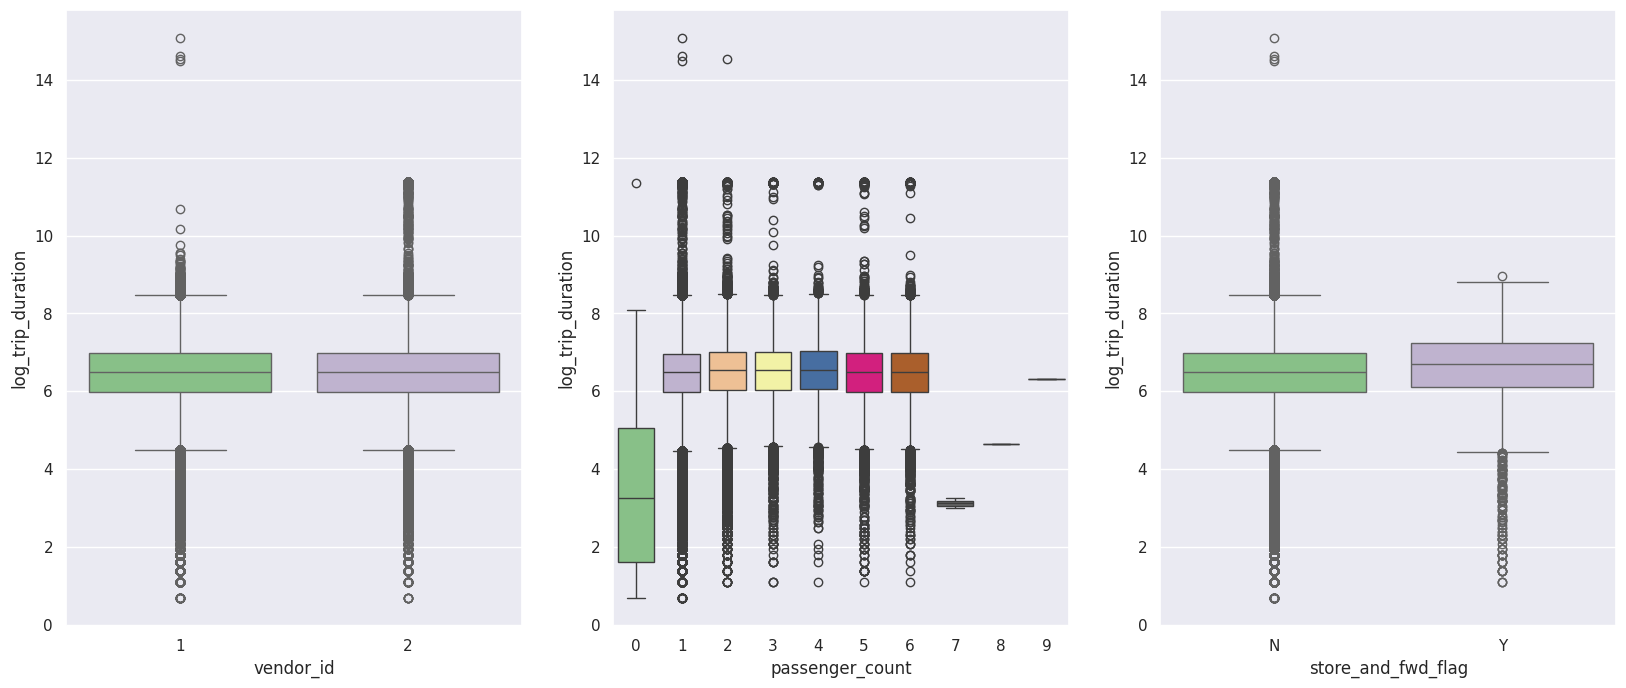

In [175]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.boxplot(x=train['vendor_id'], y=train['log_trip_duration'], hue=train['vendor_id'], palette='Accent', ax=axes[0], legend=False)
sns.boxplot(x=train['passenger_count'], y=train['log_trip_duration'], hue=train['passenger_count'], palette='Accent', ax=axes[1], legend=False)
sns.boxplot(x=train['store_and_fwd_flag'], y=train['log_trip_duration'], hue=train['store_and_fwd_flag'], palette='Accent', ax=axes[2], legend=False)

plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [176]:
train['vendor_id'] = train['vendor_id'] - 1
test['vendor_id'] = test['vendor_id'] - 1
train['store_and_fwd_flag'] = (train['store_and_fwd_flag'] == 'Y').astype(int)
test['store_and_fwd_flag'] = (test['store_and_fwd_flag'] == 'Y').astype(int)

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Думаю, не особо, поскольку по вертикальной оси логарифма длительности поездки видно, что распределение в зависимости от значений признаков практичесли не отличается. Выбиваются только поездки, где было 0 пассажиров, - там длительность сильно ниже. Возможно, это доставка, на которую тратится меньше времени, поскольку не приходится ждать пассажиров, учитывать их пожелания по маршруту, делать остановки и т.п.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [177]:
categorical = ['day_of_week', 'month', 'hour', 'is_abnormal_1', 'is_abnormal_2', 'day_of_year', 'is_traffic', 'is_free',
               'is_to_Kennedy_International_Airport', 'is_from_Kennedy_International_Airport', 'is_to_LaGuardia_Airport', 'is_from_LaGuardia_Airport',
               'pickup_cell', 'dropoff_cell', 'vendor_id', 'store_and_fwd_flag']
numeric_features = ['log_haversine', 'passenger_count']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train[categorical + numeric_features], y_train)
y_pred = model.predict(test[categorical + numeric_features])
print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4724


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

RMSE совсем незначительно уменьшилась (на 0.0002), так что лучше уберем эти признаки

In [178]:
train = train.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], axis=1)
test= test.drop(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], axis=1)

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

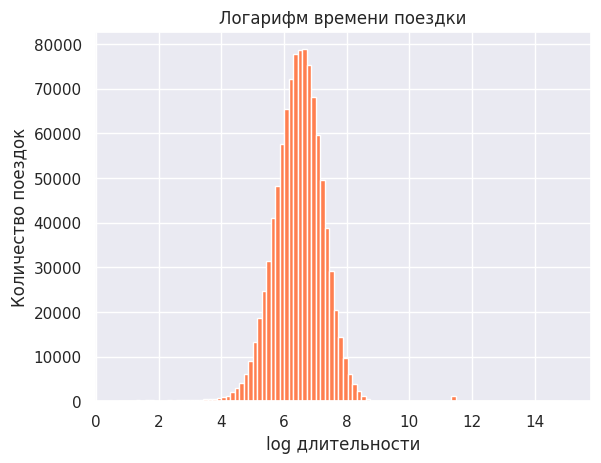

In [179]:
plt.title('Логарифм времени поездки')
plt.hist(train['log_trip_duration'], bins=100, color='coral')
plt.xlabel('log длительности')
plt.ylabel('Количество поездок')
plt.show()

Удалим значения, которые меньше 4 и больше 8.5

In [180]:
train = train[(train['log_trip_duration'] >= 4) & (train['log_trip_duration'] <= 8.5)]

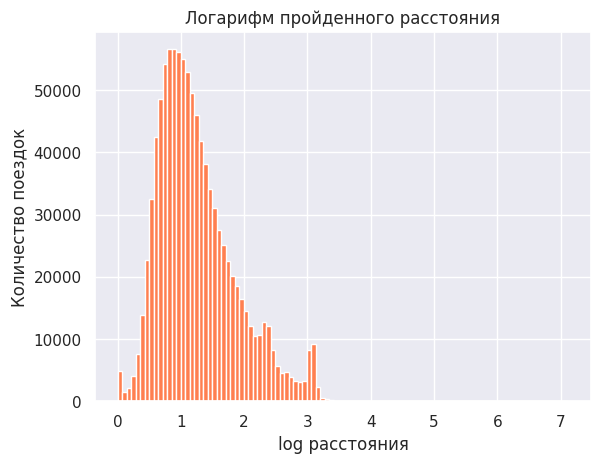

In [181]:
plt.title('Логарифм пройденного расстояния')
plt.hist(train['log_haversine'], bins=100, color='coral')
plt.xlabel('log расстояния')
plt.ylabel('Количество поездок')
plt.show()

Удалим значения, которые меньше 0 и больше 3.25

In [182]:
train = train[(train['log_haversine'] >= 0) & (train['log_haversine'] <= 3.25)]

In [183]:
# Продублируем код из задания 10, чтобы посчитать остатки регрессии
categorical = ['day_of_week', 'month', 'hour', 'is_abnormal_1', 'is_abnormal_2', 'day_of_year', 'is_traffic', 'is_free',
               'is_to_Kennedy_International_Airport', 'is_from_Kennedy_International_Airport', 'is_to_LaGuardia_Airport', 'is_from_LaGuardia_Airport',
               'pickup_cell', 'dropoff_cell']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train[categorical + numeric_features], train['log_trip_duration'])
y_pred = model.predict(train[categorical + numeric_features])
target = train['log_trip_duration']
regression_residuals = 100 * np.abs(target - y_pred) / target.mean()

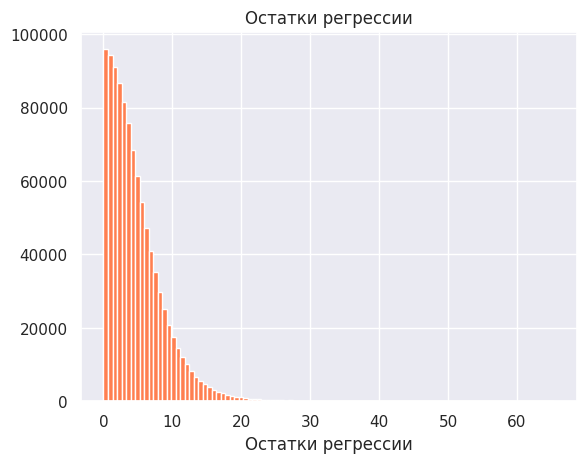

In [184]:
plt.title('Остатки регрессии')
plt.hist(regression_residuals, bins=100, color='coral')
plt.xlabel('Остатки регрессии')
plt.show()

In [185]:
train = train[regression_residuals <= 18]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [186]:
categorical

['day_of_week',
 'month',
 'hour',
 'is_abnormal_1',
 'is_abnormal_2',
 'day_of_year',
 'is_traffic',
 'is_free',
 'is_to_Kennedy_International_Airport',
 'is_from_Kennedy_International_Airport',
 'is_to_LaGuardia_Airport',
 'is_from_LaGuardia_Airport',
 'pickup_cell',
 'dropoff_cell']

In [187]:
train['day_of_week'].value_counts()

day_of_week
Friday       153414
Saturday     151453
Thursday     149793
Wednesday    143893
Tuesday      139472
Sunday       133871
Monday       128559
Name: count, dtype: int64

In [188]:
train['month'].value_counts()

month
3    176210
4    172521
5    169888
2    163567
6    160420
1    157849
Name: count, dtype: int64

In [189]:
train['hour'].value_counts()

hour
18    62423
19    62283
21    58064
20    57985
22    55520
17    52452
14    50793
12    49541
13    48885
15    48832
23    47782
11    46887
9     46377
8     46082
10    44797
16    43540
7     37883
0     36783
1     26362
6     22900
2     19239
3     14252
4     10588
5     10205
Name: count, dtype: int64

Объединим 3-5 ночи

In [190]:
train.loc[:, 'hour'] = train['hour'].replace([3, 4, 5], 3)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [191]:
categorical = ['day_of_week', 'month', 'hour', 'is_abnormal_1', 'is_abnormal_2', 'day_of_year', 'is_traffic', 'is_free',
               'is_to_Kennedy_International_Airport', 'is_from_Kennedy_International_Airport', 'is_to_LaGuardia_Airport', 'is_from_LaGuardia_Airport',
               'pickup_cell', 'dropoff_cell']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train[categorical + numeric_features], train['log_trip_duration'])
y_pred = model.predict(test[categorical + numeric_features])

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4747


Качество на тесте действительно немного ухудшилось

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [192]:
print('До OneHot-кодирования:', str(len(categorical + numeric_features)), "признаков")
print('После OneHot-кодирования: ', str(column_transformer.transform(train).shape[1]), "признаков")

До OneHot-кодирования: 15 признаков
После OneHot-кодирования:  268 признаков


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [193]:
from sklearn.linear_model import Lasso

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(train[categorical + numeric_features], train['log_trip_duration'])
y_pred = model.predict(test[categorical + numeric_features])

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.7951


Ridge лучше, если сравниваем RMSE

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [194]:
train_new, valid, y_train_new, y_valid = train_test_split(train, train['log_trip_duration'], test_size=0.2, random_state=42)

Сохраните наилучшее значение, как бенчмарк на будущее

In [195]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = ...

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [196]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [197]:
from_to = train_new['pickup_cell'].astype(str) + ' ' + train_new['dropoff_cell'].astype(str)
most_frequent = from_to.value_counts().head(100).index

In [198]:
def func_from_to(df):
  df['from_to'] = -1
  for i, pair in enumerate(most_frequent):
    f, t = pair.split(' ')
    df.loc[(df['pickup_cell'] == int(f)) & (df['dropoff_cell'] == int(t)), 'from_to'] = i
func_from_to(train_new)
func_from_to(test)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [199]:
categorical = ['day_of_week', 'month', 'hour', 'is_abnormal_1', 'is_abnormal_2', 'day_of_year', 'is_traffic', 'is_free',
               'is_to_Kennedy_International_Airport', 'is_from_Kennedy_International_Airport', 'is_to_LaGuardia_Airport', 'is_from_LaGuardia_Airport',
               'pickup_cell', 'dropoff_cell', 'from_to']
numeric_features = ['log_haversine']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(train_new[categorical + numeric_features], y_train_new)
y_pred = model.predict(test[categorical + numeric_features])

print("Test RMSE = %.4f" % root_mean_squared_error(y_test, y_pred))

Test RMSE = 0.4641


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [200]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [201]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [202]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

![](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExbnF5Y291cXloN3psajhxNW5wNGdwa204MmUxaWZjdDhsMDN5ejZ0biZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/2ucmaRWC8ZIbJ3SPuh/giphy.gif)